# Project 1: Week 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.ensemble import RandomForestRegressor

## Subtask 1

In [2]:
# Load datasets
KV_X0 = pd.read_csv('../dataset/2025_JNSM_KV_flashcrowd_2/JNSM_KV_flashcrowd_2/X.csv')  
KV_Y = pd.read_csv('../dataset/2025_JNSM_KV_flashcrowd_2/JNSM_KV_flashcrowd_2/Y.csv')   

VoD_X0 = pd.read_csv('../dataset/2025_JNSM_VoD_flashcrowd_2/JNSM_VoD_flashcrowd_2/X.csv')  
VoD_Y = pd.read_csv('../dataset/2025_JNSM_VoD_flashcrowd_2/JNSM_VoD_flashcrowd_2/Y.csv')   

# Drop unnecessary columns
KV_X0 = KV_X0.drop(columns=['Unnamed: 0', 'TimeStamp'])
VoD_X0 = VoD_X0.drop(columns=['Unnamed: 0', 'TimeStamp'])

In [3]:
# Target Column

KV_target_column = 'ReadsAvg'  
KV_Y_target = KV_Y[KV_target_column].values

VoD_target_column = 'DispFrames'  
VoD_Y_target = VoD_Y[VoD_target_column].values

In [4]:
# Describe the design matrix
n_samples, n_features = KV_X0.shape
print(f"\nDesign Matrix KV X0:")
print(f"Number of sample rows: {n_samples}")
print(f"Number of feature columns: {n_features}")

# Describe the design matrix
n_samples, n_features = VoD_X0.shape
print(f"\nDesign Matrix VoD X0:")
print(f"Number of sample rows: {n_samples}")
print(f"Number of feature columns: {n_features}")


Design Matrix KV X0:
Number of sample rows: 9722
Number of feature columns: 1723

Design Matrix VoD X0:
Number of sample rows: 18317
Number of feature columns: 1670


In [5]:
# Compute statistics for target Y
print(f"\nTarget KV Y Statistics:")
print(f"Mean: {np.mean(KV_Y_target):.3g}")
print(f"Standard Deviation: {np.std(KV_Y_target):.3g}")
print(f"Maximum: {np.max(KV_Y_target):.3g}")
print(f"Minimum: {np.min(KV_Y_target):.3g}")
print(f"25th Percentile: {np.percentile(KV_Y_target, 25):.3g}")
print(f"50th Percentile: {np.percentile(KV_Y_target, 50):.3g}")
print(f"95th Percentile: {np.percentile(KV_Y_target, 95):.3g}")

# Compute statistics for target Y
print(f"\nTarget VoD Y Statistics:")
print(f"Mean: {np.mean(VoD_Y_target):.3g}")
print(f"Standard Deviation: {np.std(VoD_Y_target):.3g}")
print(f"Maximum: {np.max(VoD_Y_target):.3g}")
print(f"Minimum: {np.min(VoD_Y_target):.3g}")
print(f"25th Percentile: {np.percentile(VoD_Y_target, 25):.3g}")
print(f"50th Percentile: {np.percentile(VoD_Y_target, 50):.3g}")
print(f"95th Percentile: {np.percentile(VoD_Y_target, 95):.3g}")


Target KV Y Statistics:
Mean: 55.3
Standard Deviation: 3.13
Maximum: 152
Minimum: 51.1
25th Percentile: 53.3
50th Percentile: 54.1
95th Percentile: 60.5

Target VoD Y Statistics:
Mean: 22
Standard Deviation: 4.33
Maximum: 25
Minimum: 0
25th Percentile: 24
50th Percentile: 24
95th Percentile: 24


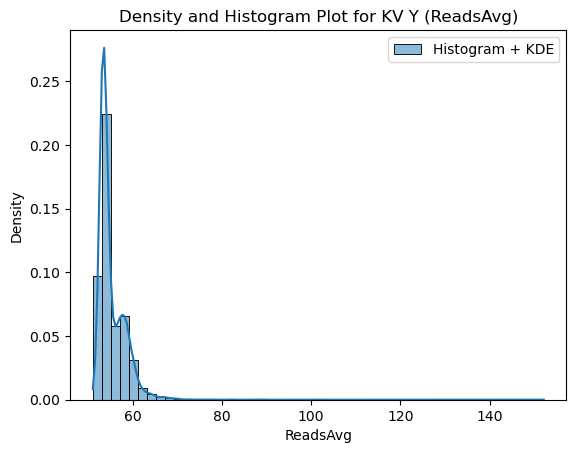

In [6]:
# Plot density and histogram for Y on the same figure
plt.figure()
# Use sns.histplot, which can overlay a KDE (density) plot
sns.histplot(KV_Y_target, bins=50, stat="density", kde=True, label="Histogram + KDE")
# sns.kdeplot(KV_Y_target,color='red')
plt.title(f"Density and Histogram Plot for KV Y ({KV_target_column})")
plt.xlabel(KV_target_column)
plt.ylabel("Density")
plt.legend()
plt.show()

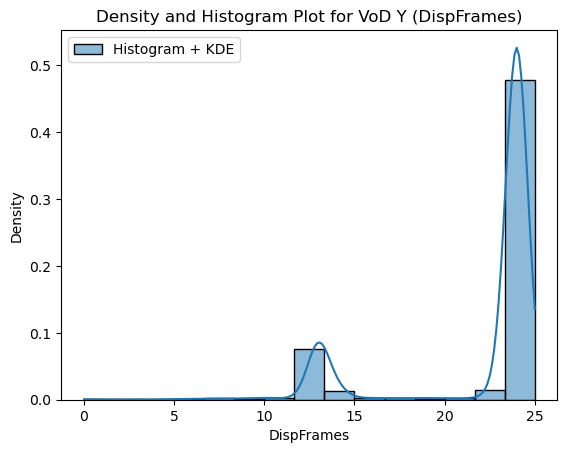

In [7]:
# Plot density and histogram for Y on the same figure
plt.figure()
# Use sns.histplot, which can overlay a KDE (density) plot
sns.histplot(VoD_Y_target, bins=15, stat="density", kde=True, label="Histogram + KDE")
# sns.kdeplot(VoD_Y_target,color='red')
plt.title(f"Density and Histogram Plot for VoD Y ({VoD_target_column})")
plt.xlabel(VoD_target_column)
plt.ylabel("Density")
plt.legend()
plt.show()

## Subtask 2: Pre-process 

In [8]:
# (a) l2 Normalization
# X_1: l2-norm=1 for each feature column
# axis=0 operates on columns
KV_X_1 = normalize(KV_X0, norm='l2', axis=0)

# X_2: l2-norm=1 for each sample row
# axis=1 operates on rows
KV_X_2 = normalize(KV_X0, norm='l2', axis=1)

# (b) Restriction to interval [0, 1] [cite: 41]
# X_3: Min-max scaling on feature columns
# This is the default behavior of MinMaxScaler
KV_X_3 = MinMaxScaler().fit_transform(KV_X0)

# X_4: Min-max scaling on sample rows
# We can transpose, scale columns (which are now rows), and transpose back
KV_X_4 = MinMaxScaler().fit_transform(KV_X0.T).T

# (c) Standardization [cite: 42]
# X_5: Standardization (0 mean, 1 var) on feature columns
# This is the default behavior of StandardScaler
KV_X_5 = StandardScaler().fit_transform(KV_X0)

# X_6: Standardization (0 mean, 1 var) on sample rows
# We transpose, scale columns (which are now rows), and transpose back
KV_X_6 = StandardScaler().fit_transform(KV_X0.T).T

# Optional: Verification of one sample/feature
print("\nVerification (value for first feature/sample):")
print(f"  X_1 col norm (should be 1.0): {np.linalg.norm(KV_X_1[:, 0]):.3f}")
print(f"  X_2 row norm (should be 1.0): {np.linalg.norm(KV_X_2[0, :]):.3f}")
print(f"  X_3 col min/max (should be ~0/1): {np.min(KV_X_3[:, 0]):.3f}/{np.max(KV_X_3[:, 0]):.3f}")
print(f"  X_4 row min/max (should be ~0/1): {np.min(KV_X_4[0, :]):.3f}/{np.max(KV_X_4[0, :]):.3f}")
print(f"  X_5 col mean/std (should be ~0/1): {np.mean(KV_X_5[:, 0]):.3f}/{np.std(KV_X_5[:, 0]):.3f}")
print(f"  X_6 row mean/std (should be ~0/1): {np.mean(KV_X_6[0, :]):.3f}/{np.std(KV_X_6[0, :]):.3f}")


Verification (value for first feature/sample):
  X_1 col norm (should be 1.0): 1.000
  X_2 row norm (should be 1.0): 1.000
  X_3 col min/max (should be ~0/1): 0.000/1.000
  X_4 row min/max (should be ~0/1): 0.000/1.000
  X_5 col mean/std (should be ~0/1): -0.000/1.000
  X_6 row mean/std (should be ~0/1): -0.000/1.000


In [9]:
# (a) l2 Normalization
# X_1: l2-norm=1 for each feature column
# axis=0 operates on columns
VoD_X_1 = normalize(VoD_X0, norm='l2', axis=0)

# X_2: l2-norm=1 for each sample row
# axis=1 operates on rows
VoD_X_2 = normalize(VoD_X0, norm='l2', axis=1)

# (b) Restriction to interval [0, 1]
# X_3: Min-max scaling on feature columns
# This is the default behavior of MinMaxScaler
VoD_X_3 = MinMaxScaler().fit_transform(VoD_X0)

# X_4: Min-max scaling on sample rows
# We can transpose, scale columns (which are now rows), and transpose back
VoD_X_4 = MinMaxScaler().fit_transform(VoD_X0.T).T

# (c) Standardization [cite: 42]
# X_5: Standardization (0 mean, 1 var) on feature columns
# This is the default behavior of StandardScaler
VoD_X_5 = StandardScaler().fit_transform(VoD_X0)

# X_6: Standardization (0 mean, 1 var) on sample rows
# We transpose, scale columns (which are now rows), and transpose back
VoD_X_6 = StandardScaler().fit_transform(VoD_X0.T).T

# Optional: Verification of one sample/feature
print("\nVerification (value for first feature/sample):")
print(f"  X_1 col norm (should be 1.0): {np.linalg.norm(VoD_X_1[:, 0]):.3f}")
print(f"  X_2 row norm (should be 1.0): {np.linalg.norm(VoD_X_2[0, :]):.3f}")
print(f"  X_3 col min/max (should be ~0/1): {np.min(VoD_X_3[:, 0]):.3f}/{np.max(VoD_X_3[:, 0]):.3f}")
print(f"  X_4 row min/max (should be ~0/1): {np.min(VoD_X_4[0, :]):.3f}/{np.max(VoD_X_4[0, :]):.3f}")
print(f"  X_5 col mean/std (should be ~0/1): {np.mean(VoD_X_5[:, 0]):.3f}/{np.std(VoD_X_5[:, 0]):.3f}")
print(f"  X_6 row mean/std (should be ~0/1): {np.mean(VoD_X_6[0, :]):.3f}/{np.std(VoD_X_6[0, :]):.3f}")


Verification (value for first feature/sample):
  X_1 col norm (should be 1.0): 1.000
  X_2 row norm (should be 1.0): 1.000
  X_3 col min/max (should be ~0/1): 0.000/1.000
  X_4 row min/max (should be ~0/1): 0.000/1.000
  X_5 col mean/std (should be ~0/1): 0.000/1.000
  X_6 row mean/std (should be ~0/1): 0.000/1.000


## Subtask 3: Reduce matrix

### KV Dataset

In [10]:
KV_rf = RandomForestRegressor(n_estimators=50, random_state=42)
KV_rf.fit(KV_X0, KV_Y_target)

RandomForestRegressor(n_estimators=50, random_state=42)

In [12]:
# Get feature importances
KV_importances = KV_rf.feature_importances_
N_TOP_FEATURES = 18
# argsort gives indices of sorted values (ascending), so we reverse it [::-1]
KV_top_indices = np.argsort(KV_importances)[::-1][:N_TOP_FEATURES]
# Select top 18 features
KV_X_prime = KV_X0.values[:, KV_top_indices]

print(f"\nTop 18 features selected based on importance:")
for i, idx in enumerate(KV_top_indices[:18]):
    print(f"Feature {idx}: importance = {KV_importances[idx]:.3g}")




Top 18 features selected based on importance:
Feature 898: importance = 0.174
Feature 386: importance = 0.1
Feature 135: importance = 0.0532
Feature 235: importance = 0.0486
Feature 494: importance = 0.0348
Feature 1256: importance = 0.0336
Feature 752: importance = 0.0333
Feature 486: importance = 0.0239
Feature 899: importance = 0.0223
Feature 1413: importance = 0.0168
Feature 526: importance = 0.0166
Feature 759: importance = 0.0133
Feature 1143: importance = 0.0132
Feature 996: importance = 0.0116
Feature 230: importance = 0.0111
Feature 666: importance = 0.0108
Feature 675: importance = 0.0105
Feature 774: importance = 0.00927


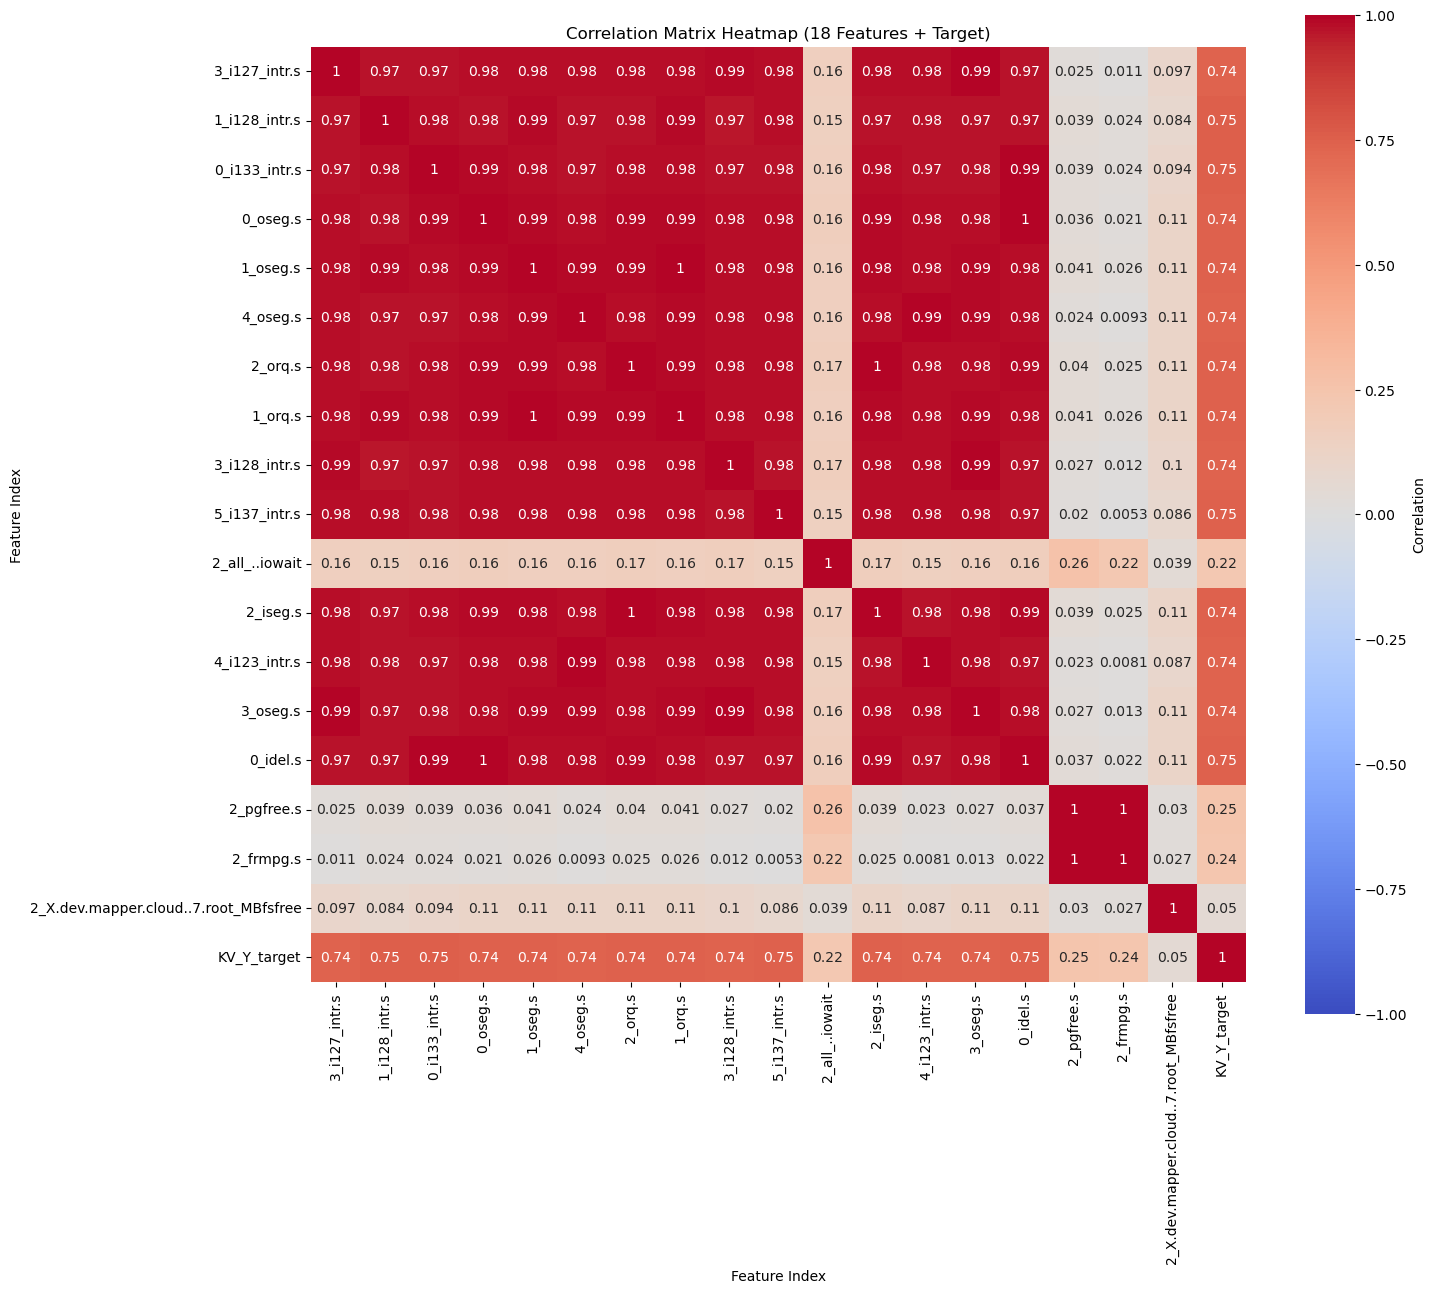

In [23]:
# Create Z matrix by concatenating X' and Y
KV_Z = np.column_stack([KV_X_prime, KV_Y_target])

KV_correlation_matrix = np.corrcoef(KV_Z.T)
KV_feature_names = KV_X0.iloc[:, KV_top_indices].columns.tolist()
KV_feature_names.append('KV_Y_target')
KV_correlation_df = pd.DataFrame(KV_correlation_matrix, 
                                 index=KV_feature_names, 
                                 columns=KV_feature_names)
# Plot heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(KV_correlation_df, annot=True, cmap='coolwarm', center=0,
            vmin=-1, vmax=1, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix Heatmap (18 Features + Target)')
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.tight_layout()
plt.savefig('task1_KV_correlation_heatmap.png')
plt.show()

In [27]:
# Find features with highest and lowest correlation with target
KV_target_correlations = KV_correlation_matrix[-1, :-1]  # Exclude target itself
KV_abs_correlations = np.abs(KV_target_correlations)

KV_highest_corr_idx = np.argmax(KV_abs_correlations)
KV_lowest_corr_idx = np.argmin(KV_abs_correlations)

KV_F_h = KV_X_prime[:, KV_highest_corr_idx]
KV_F_l = KV_X_prime[:, KV_lowest_corr_idx]

KV_F_h_name = KV_feature_names[KV_highest_corr_idx]
KV_F_l_name = KV_feature_names[KV_lowest_corr_idx]
print(f"\nFeature with highest correlation (F_h):")
print(f"Feature index in X': {KV_highest_corr_idx}")
print(f"Feature name in X': {KV_F_h_name}")
print(f"Correlation with target: {KV_target_correlations[KV_highest_corr_idx]:.3g}")

print(f"\nFeature with lowest correlation (F_l):")
print(f"Feature index in X': {KV_lowest_corr_idx}")
print(f"Feature name in X': {KV_F_l_name}")
print(f"Correlation with target: {KV_target_correlations[KV_lowest_corr_idx]:.3g}")




Feature with highest correlation (F_h):
Feature index in X': 2
Feature name in X': 0_i133_intr.s
Correlation with target: 0.754

Feature with lowest correlation (F_l):
Feature index in X': 17
Feature name in X': 2_X.dev.mapper.cloud..7.root_MBfsfree
Correlation with target: 0.0503


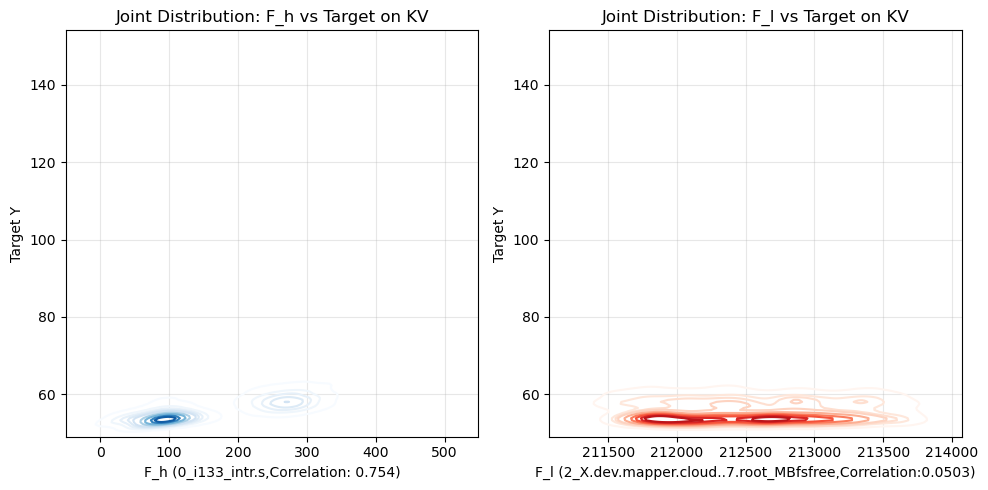

In [36]:
# Create joint distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# Joint distribution for F_h and Y
df_high = pd.DataFrame({'Feature': KV_F_h, 'Target': KV_Y_target})
sns.kdeplot(data=df_high, x='Feature', y='Target', ax=ax1, fill=False, cmap='Blues')
ax1.set_xlabel(f'F_h ({KV_F_h_name},Correlation: {KV_target_correlations[KV_highest_corr_idx]:.3g})')
ax1.set_ylabel('Target Y')
ax1.set_title('Joint Distribution: F_h vs Target on KV')
ax1.grid(True, alpha=0.3)

# Joint distribution for F_l and Y
df_low = pd.DataFrame({'Feature': KV_F_l, 'Target': KV_Y_target})
sns.kdeplot(data=df_low, x='Feature', y='Target', ax=ax2, fill=False, cmap='Reds')
ax2.set_xlabel(f'F_l ({KV_F_l_name},Correlation:{KV_target_correlations[KV_lowest_corr_idx]:.3g})')
ax2.set_ylabel('Target Y')
ax2.set_title('Joint Distribution: F_l vs Target on KV')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task1_KV_joint_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### VoD Dataset

In [29]:
# Use 50 trees since there are more samples in VoD dataset
VoD_rf = RandomForestRegressor(n_estimators=50, random_state=42)
VoD_rf.fit(VoD_X0, VoD_Y_target)

RandomForestRegressor(n_estimators=50, random_state=42)

In [30]:
VoD_importances = VoD_rf.feature_importances_
VoD_top_indices = np.argsort(VoD_importances)[::-1][:N_TOP_FEATURES]
VoD_X_prime = VoD_X0.values[:, VoD_top_indices]

print(f"\nTop 18 features selected based on importance:")
for i, idx in enumerate(VoD_top_indices[:18]):
    print(f"Feature {idx}: importance = {VoD_importances[idx]:.3g}")

# VoD_X_prime.to_csv("../dataset/VoD_X_prime.csv", index=False)


Top 18 features selected based on importance:
Feature 871: importance = 0.15
Feature 614: importance = 0.0803
Feature 883: importance = 0.0262
Feature 876: importance = 0.0129
Feature 590: importance = 0.0108
Feature 444: importance = 0.00998
Feature 616: importance = 0.00825
Feature 877: importance = 0.00744
Feature 1148: importance = 0.00702
Feature 608: importance = 0.00516
Feature 1141: importance = 0.0051
Feature 879: importance = 0.00503
Feature 606: importance = 0.00484
Feature 885: importance = 0.00478
Feature 504: importance = 0.00432
Feature 872: importance = 0.0042
Feature 1138: importance = 0.00367
Feature 1390: importance = 0.00332


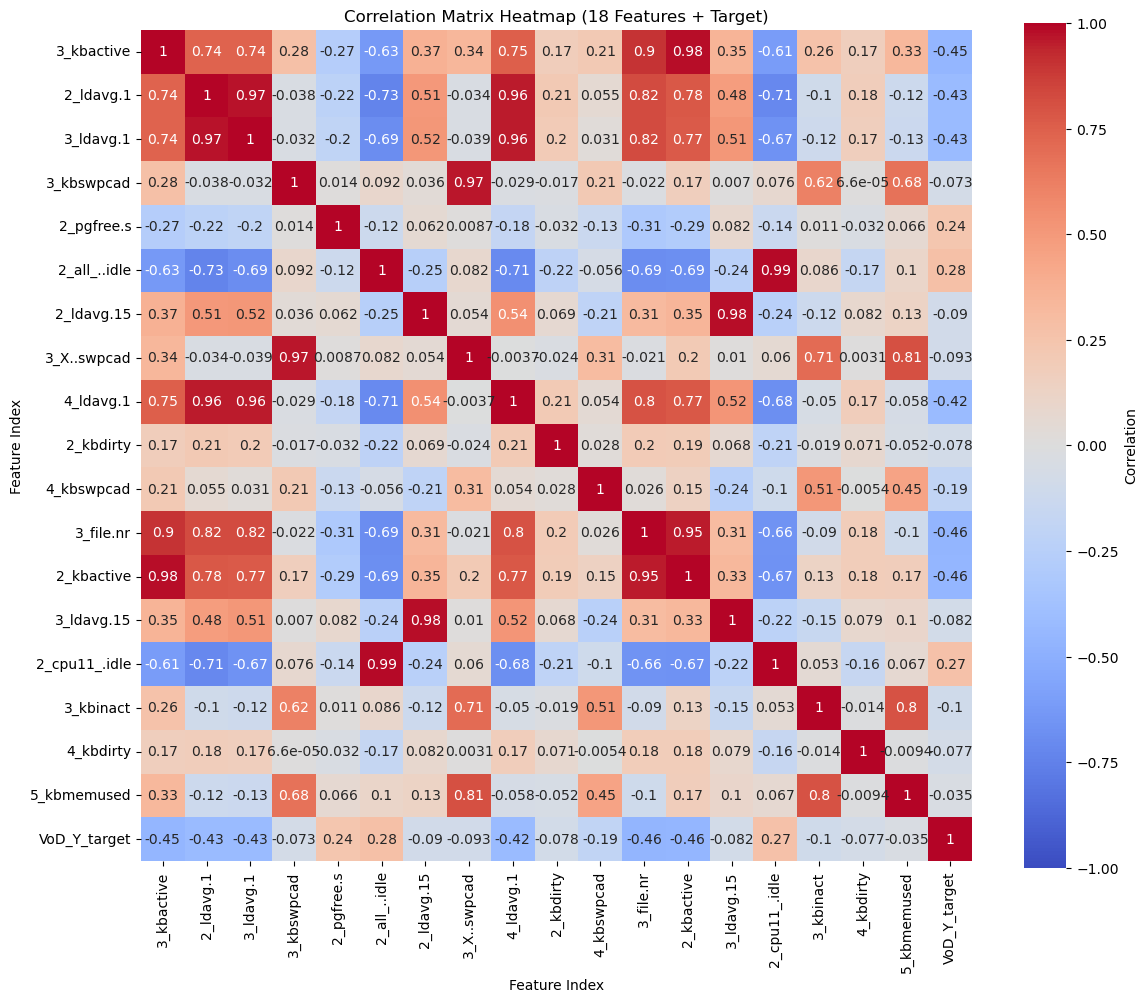

In [31]:
# Create Z matrix by concatenating X' and Y
VoD_Z = np.column_stack([VoD_X_prime, VoD_Y_target])

VoD_feature_names = VoD_X0.iloc[:, VoD_top_indices].columns.tolist()
VoD_feature_names.append('VoD_Y_target')

VoD_correlation_matrix = np.corrcoef(VoD_Z.T)
VoD_correlation_df = pd.DataFrame(VoD_correlation_matrix, 
                                 index=VoD_feature_names, 
                                 columns=VoD_feature_names)
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(VoD_correlation_df, annot=True, cmap='coolwarm', center=0,
            vmin=-1, vmax=1, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix Heatmap (18 Features + Target)')
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.tight_layout()
plt.savefig('task1_VoD_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
print('\nKV top 18 feature names:')
for i in range(len(KV_feature_names)-1):
    print(f' {KV_feature_names[i]}')

print('\nVoD top 18 feature names:')
for i in range(len(KV_feature_names)-1):
    print(f' {VoD_feature_names[i]}')



KV top 18 feature names:
 3_i127_intr.s
 1_i128_intr.s
 0_i133_intr.s
 0_oseg.s
 1_oseg.s
 4_oseg.s
 2_orq.s
 1_orq.s
 3_i128_intr.s
 5_i137_intr.s
 2_all_..iowait
 2_iseg.s
 4_i123_intr.s
 3_oseg.s
 0_idel.s
 2_pgfree.s
 2_frmpg.s
 2_X.dev.mapper.cloud..7.root_MBfsfree

VoD top 18 feature names:
 3_kbactive
 2_ldavg.1
 3_ldavg.1
 3_kbswpcad
 2_pgfree.s
 2_all_..idle
 2_ldavg.15
 3_X..swpcad
 4_ldavg.1
 2_kbdirty
 4_kbswpcad
 3_file.nr
 2_kbactive
 3_ldavg.15
 2_cpu11_.idle
 3_kbinact
 4_kbdirty
 5_kbmemused


In [32]:
# Find features with highest and lowest correlation with target
VoD_target_correlations = VoD_correlation_matrix[-1, :-1]  # Exclude target itself
VoD_abs_correlations = np.abs(VoD_target_correlations)

VoD_highest_corr_idx = np.argmax(VoD_abs_correlations)
VoD_lowest_corr_idx = np.argmin(VoD_abs_correlations)

VoD_F_h = VoD_X_prime[:, VoD_highest_corr_idx]
VoD_F_l = VoD_X_prime[:, VoD_lowest_corr_idx]

VoD_F_h_name = VoD_feature_names[VoD_highest_corr_idx]
VoD_F_l_name = VoD_feature_names[VoD_lowest_corr_idx]

print(f"\nFeature with highest correlation (F_h):")
print(f"Feature index in X': {VoD_highest_corr_idx}")
print(f"Feature name in X': {VoD_F_h_name}")
print(f"Correlation with target: {VoD_target_correlations[VoD_highest_corr_idx]:.3g}")

print(f"\nFeature with lowest correlation (F_l):")
print(f"Feature index in X': {VoD_lowest_corr_idx}")
print(f"Feature name in X': {VoD_F_l_name}")
print(f"Correlation with target: {VoD_target_correlations[VoD_lowest_corr_idx]:.3g}")


Feature with highest correlation (F_h):
Feature index in X': 11
Feature name in X': 3_file.nr
Correlation with target: -0.464

Feature with lowest correlation (F_l):
Feature index in X': 17
Feature name in X': 5_kbmemused
Correlation with target: -0.0349


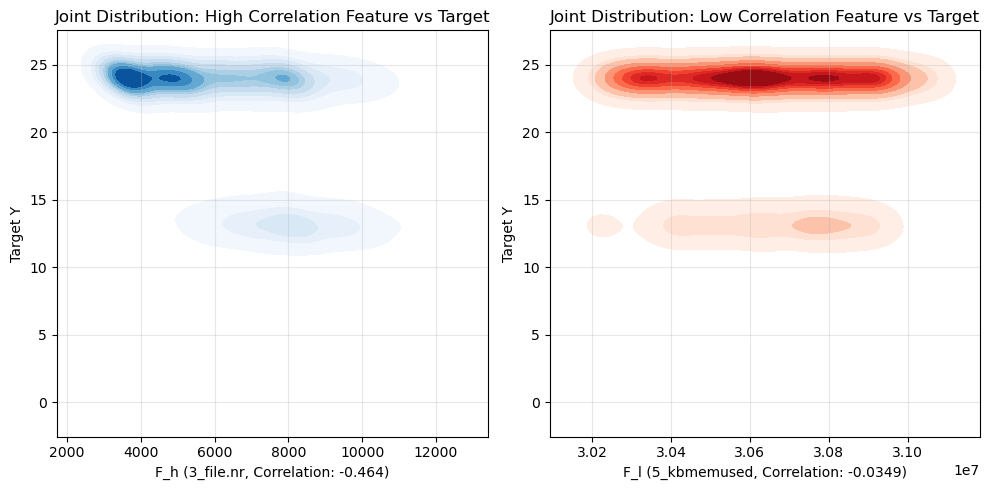

In [ ]:
# # Create joint distribution plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# # Joint distribution for F_h and Y
# df_high = pd.DataFrame({'Feature': VoD_F_h, 'Target': VoD_Y_target})
# sns.kdeplot(data=df_high, x='Feature', y='Target', ax=ax1, fill=True, cmap='Blues')
# ax1.set_xlabel(f'F_h ({VoD_F_h_name}, Correlation: {VoD_target_correlations[VoD_highest_corr_idx]:.3g})')
# ax1.set_ylabel('Target Y')
# ax1.set_title('Joint Distribution: High Correlation Feature vs Target')
# ax1.grid(True, alpha=0.3)

# # Joint distribution for F_l and Y
# df_low = pd.DataFrame({'Feature': VoD_F_l, 'Target': VoD_Y_target})
# sns.kdeplot(data=df_low, x='Feature', y='Target', ax=ax2, fill=True, cmap='Reds')
# ax2.set_xlabel(f'F_l ({VoD_F_l_name}, Correlation: {VoD_target_correlations[VoD_lowest_corr_idx]:.3g})')
# ax2.set_ylabel('Target Y')
# ax2.set_title('Joint Distribution: Low Correlation Feature vs Target')
# ax2.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.savefig('task1_VoD_joint_distributions.png', dpi=300, bbox_inches='tight')
# plt.show()

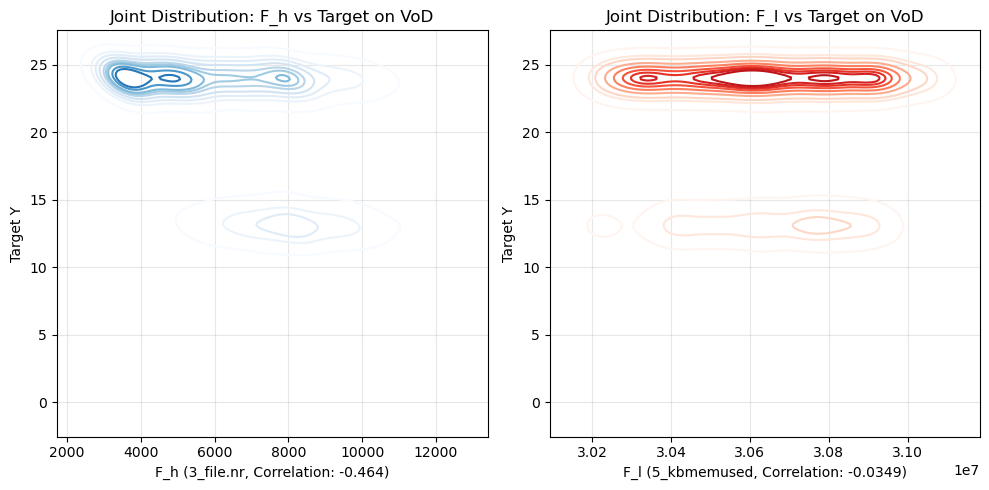

In [35]:
# Create joint distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# Joint distribution for F_h and Y
df_high = pd.DataFrame({'Feature': VoD_F_h, 'Target': VoD_Y_target})
sns.kdeplot(data=df_high, x='Feature', y='Target', ax=ax1, fill=False, cmap='Blues')
ax1.set_xlabel(f'F_h ({VoD_F_h_name}, Correlation: {VoD_target_correlations[VoD_highest_corr_idx]:.3g})')
ax1.set_ylabel('Target Y')
ax1.set_title('Joint Distribution: F_h vs Target on VoD')
ax1.grid(True, alpha=0.3)

# Joint distribution for F_l and Y
df_low = pd.DataFrame({'Feature': VoD_F_l, 'Target': VoD_Y_target})
sns.kdeplot(data=df_low, x='Feature', y='Target', ax=ax2, fill=False, cmap='Reds')
ax2.set_xlabel(f'F_l ({VoD_F_l_name}, Correlation: {VoD_target_correlations[VoD_lowest_corr_idx]:.3g})')
ax2.set_ylabel('Target Y')
ax2.set_title('Joint Distribution: F_l vs Target on VoD')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task1_VoD_joint_distributions.png')
plt.show()